# 🚗 Predicting the Sale Price of Cars Using Machine Learning
In this notebook, we will go through a machine-learning project to predict the sale prices of cars.

## 1. Problem Definition
> How well can we predict the future sale price of a car, given its characteristics and previous examples of how much similar cars have been sold for?
## 2. Data
The data is downloaded from the Kaggle Car Price Prediction Challenge:
https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

There is one main dataset, a CSV file with 19237 rows x 18 columns (Including Price Columns as Target).

## 3. Evaluation
The evaluation metrics for this project are R-squared and RMSE (root mean squared error) between the actual price and predicted auction prices.

**Note:** The goal of most regression evaluation metrics is to minimize error. For instance, in this project, our goal will be to build a machine-learning model that minimizes RMSE and gets a R-squared score close to one

## 4. Features
There is a brief description of each feature in the dataset:
* ID: A unique identifier for each vehicle.
* Price: The price of the car in USD (target column, the value to predict in regression tasks).
* Levy: Additional fee or tax for the vehicle in USD
* Manufacturer: The manufacturer or brand of the car (e.g., Toyota, Mazda, etc.).
* Model: The specific model of the car (e.g., Elantra, RX 450, etc.).
* Prod. year: The year the vehicle was manufactured.
* Category: The type or category of the car (e.g., sedan, jeep, minibus, etc.).
* Leather interior: Indicates whether the car has a leather interior (yes/no).
* Fuel type: The type of fuel the car uses (e.g., petrol, diesel, hybrid, etc.).
* Engine volume: The engine capacity in liters.
* Mileage: The distance the vehicle has traveled (in kilometers).
* Cylinders: The number of cylinders in the car's engine.
* Gearbox type: The type of gearbox or transmission (e.g., manual, automatic, semi-automatic).
* Drive wheels: The type of drivetrain (e.g., FWD - front-wheel drive, RWD - rear-wheel drive, AWD - all-wheel drive).
* Doors: The number of doors on the vehicle.
* Wheel: The steering side of the vehicle (e.g., left-hand drive or right-hand drive).
* Color: The color of the car (e.g., black, white, red, etc.).
* Airbags: The number of airbags (safety cushions) in the car.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from scipy.stats import norm
from scipy import stats

# Data Loading

In [888]:
df = pd.read_csv("data/car_price_prediction.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [639]:
df.shape

(19237, 18)

In [915]:
df.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

# Explore The Data

## Columns of dataset

In [640]:
#Check data columns
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

## Check Data Type

In [642]:
#Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Check Missing Value

In [478]:
# check Missing value
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## Check Unique Values

In [479]:
# Check the number of unique values of each column
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

## Check Duplicate Data

In [480]:
# Check Duplication
df.duplicated().sum()

np.int64(313)

## Statistics of Dataset

In [481]:
#Check statistics of the data set
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## Conclusion

* This dataset contains 19237 entries (0 to 19236) with a total of 18 columns
* There is no missing value
* But there is value '-' in column 'Levy' which needs to be addressed
* Some feature's data types need to be changed to numeric (Levy, Mileage, Engine Volume, and Doors)
* 313 duplicate rows need to be dropped

In [482]:
df.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

# Data Cleaning and Transformation

## Copy data set

In [955]:
#Copy dataset for changes
df_tmp = df.copy().drop("ID", axis=1)
df_columns = df_tmp.columns
df_tmp.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Delete Data with Price Below 500

In [851]:
# df_tmp = df_tmp[df_tmp.Price > 500]
# df_tmp.shape

## Feature Enginering (e.g. convert year to age)

In [852]:
# import datetime
# now_date=datetime.datetime.now()
# df_tmp['Age']=now_date.year-df_tmp['Prod. year']
# df_tmp=df_tmp.drop(['Prod. year'],axis=1)
# df_tmp

## Convert Levy, Mileage, and Engine Volume into Numeric

In [853]:
# Convert 'Levy' to numeric, replacing non-numeric values (e.g., "-") with 0
df_tmp['Levy'] = df_tmp['Levy'].str.replace('-', '0', regex=False).astype(int)

# Extract numeric values from 'Mileage' and convert to numeric
df_tmp['Mileage'] = df_tmp['Mileage'].str.replace('km','').astype(int)

# Extract numeric values from 'Engine volume' (removing potential non-numeric characters) and convert to numeric
df_tmp["Engine volume"] = df_tmp["Engine volume"].str.replace(" Turbo", "", regex=False).astype(float)

# # Save the modified dataset to a new file (optional)
# df_tmp.to_csv("car_price_prediction_cleaned.csv", index=False)

In [854]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [855]:
# Count the number of NaN values in the 'Levy' column
missing_levy_count = df_tmp['Levy'].isna().sum()

# Display the result
print(f"Jumlah nilai NaN di kolom 'Levy': {missing_levy_count}")

Jumlah nilai NaN di kolom 'Levy': 0


In [856]:
# # Fill NaN values in 'Levy' with the median
# levy_median = df_tmp['Levy'].median()
# df_tmp['Levy'] = df_tmp['Levy'].fillna(levy_median)

# # Print confirmation and check distribution
# print(f"Filled NaN in 'Levy' with median value: {levy_median}")

## Remove Duplicates

In [857]:
# df_tmp = df_tmp.drop_duplicates()
# print(f"Duplicates removed. New dataset shape: {df_tmp.shape}")
# df_tmp

## Remove Outlier

In [858]:
numeric_columns = df_tmp.select_dtypes(exclude=['object']).columns

# Calculate the IQR for each numeric column
Q1 = df_tmp[numeric_columns].quantile(0.25)
Q3 = df_tmp[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_tmp = df_tmp[~((df_tmp[numeric_columns] < lower_bound) | (df_tmp[numeric_columns] > upper_bound)).any(axis=1)]

# Display the cleaned data
df_tmp.shape

(12457, 17)

In [859]:
df_tmp['Levy'].describe()

count    12457.000000
mean       576.796018
std        395.924629
min          0.000000
25%        294.000000
50%        640.000000
75%        810.000000
max       2278.000000
Name: Levy, dtype: float64

## Encoding Binary Data

In [860]:
# #label Encode Binary data
# from sklearn.preprocessing import LabelEncoder

# encoders = {}

# # Label Encoding will be used for columns with 2 or less unique values
# le_count = 0
# for col in df_tmp.columns[1:]:
#     if df_tmp[col].dtype == 'object':
#         if len(list(df_tmp[col].unique())) <= 2:
#             print(col)
#             le = LabelEncoder()
#             df_tmp[col] = le.fit_transform(df_tmp[col])
#             encoders[col] = le
#             le_count += 1
# print('{} columns were label encoded.'.format(le_count))

## Encoding Categorical Data

In [861]:
# Select object (categorical) columns
from category_encoders import LeaveOneOutEncoder
categorical_columns = df_tmp.select_dtypes(include='object').columns

# Initialize LeaveOneOutEncoder
loo_encoder = LeaveOneOutEncoder(cols=categorical_columns)

# Apply LeaveOneOutEncoder
# 'Price' is the target column
df_tmp[categorical_columns] = loo_encoder.fit_transform(df_tmp[categorical_columns], df_tmp['Price'])

In [862]:
df_tmp

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,8467,0,11495.982968,10967.913349,2006,11537.067621,13916.132175,13998.443867,1.3,200000,4.0,14187.623881,15206.209148,15206.107359,8727.111697,14971.523742,2
3,3607,862,12902.676507,9319.920354,2011,20659.841913,15724.239459,10535.253777,2.5,168966,4.0,14709.135188,13796.390734,15206.509643,15820.417477,15976.131671,0
4,11726,446,11492.018248,10960.281030,2014,11535.771281,15723.301606,13997.930720,1.3,91901,4.0,14708.259918,15205.904312,15205.837596,15819.700124,14781.934968,4
5,39493,891,19908.756739,30737.334286,2016,20646.740051,15720.094143,24012.445294,2.0,160931,4.0,14705.266494,15203.307081,15203.539194,15817.246775,15964.662832,4
6,1803,761,13063.865371,11910.694130,2010,11539.718377,15724.447846,10535.873283,1.8,258909,4.0,14709.329668,15206.832476,15206.658969,15820.576869,15976.708213,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645,13064.327897,11912.066941,2011,11540.248608,15724.601825,10536.331044,1.8,307325,4.0,14709.473372,15206.957160,15206.769307,15820.694646,14786.117800,12
19233,15681,831,19916.398588,12213.704301,2011,13261.207512,15722.844750,13997.307983,2.4,161600,4.0,19265.982489,15205.534375,15205.510223,15819.350680,13109.109344,8
19234,26108,836,19913.052311,27087.584000,2010,20651.626871,15721.640291,24017.829445,2.0,116365,4.0,14706.709465,15204.559068,15204.647132,15818.429404,16520.991714,4
19235,5331,1288,14029.972308,17172.195489,2007,20659.212486,15724.040314,24026.187047,2.0,51258,4.0,14708.949332,15206.502479,15206.366940,15820.265153,14972.643342,4


In [863]:
df_tmp.nunique()

Price               1733
Levy                 333
Manufacturer        4209
Model               6167
Prod. year            21
Category            2964
Leather interior    2021
Fuel type           2645
Engine volume         24
Mileage             5706
Cylinders              1
Gear box type       2277
Drive wheels        2148
Doors               1902
Wheel               1895
Color               4007
Airbags               17
dtype: int64

In [864]:
df_tmp.describe()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.0,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000
mean,15171.412459,576.796018,15173.071130,15091.435892,2011.996388,15171.412459,15171.412459,15171.412459,1.933740,123410.469375,4.0,15171.412459,15171.412459,15171.412459,15171.412459,15171.412459,6.320623
std,11259.754324,395.924629,4548.155875,6885.678248,4.035258,3754.518384,832.493450,4727.851993,0.392108,73926.655374,0.0,1607.906142,607.940286,303.024501,2043.505784,1022.253900,4.071075
min,1.000000,0.000000,150.000000,30.000000,2000.000000,10818.117647,13905.975513,7886.947761,0.800000,0.000000,4.0,13393.762115,13758.423077,13355.093548,8694.564644,7505.466667,0.000000
25%,6743.000000,294.000000,12891.123001,10971.619458,2010.000000,13259.317613,13916.297262,13785.763374,1.600000,69120.000000,4.0,14706.719276,15204.771771,15204.991060,15818.464040,14780.698625,4.000000
50%,14113.000000,640.000000,13064.386884,12216.444892,2013.000000,13262.093466,15722.138385,13997.377263,2.000000,117470.000000,4.0,14708.070289,15205.613881,15205.627100,15819.295282,14970.403784,4.000000
75%,21012.000000,810.000000,19912.094031,16454.833333,2015.000000,20541.807767,15723.551230,13999.690600,2.200000,167435.000000,4.0,14709.388853,15206.414461,15206.250062,15820.043471,15973.074784,12.000000
max,47120.000000,2278.000000,36065.000000,46728.000000,2020.000000,23098.940141,15724.655770,24028.321400,3.500000,363661.000000,4.0,19275.787367,17165.678514,17296.412698,15820.736084,17415.867470,16.000000


# EDA

## Analysisi Numeric Features Distribution

In [865]:
# # Separate numeric columns
# numeric_columns = df_tmp.select_dtypes(include='number').columns

# # Plot numeric features
# plt.figure(figsize=(12, 8))
# for i, col in enumerate(numeric_columns, 1):
#     plt.subplot((len(numeric_columns) + 2) // 3, 3, i)  # Adjust rows/cols dynamically
#     sns.histplot(df_tmp[col], kde=True, bins=30, color='skyblue')
#     plt.title(f'Distribution of {col}')
#     plt.tight_layout()

# plt.show()

C:\conda_tmp\ipykernel_28796\1538079036.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp['Price'] , fit=norm)


<Axes: xlabel='Price', ylabel='Density'>

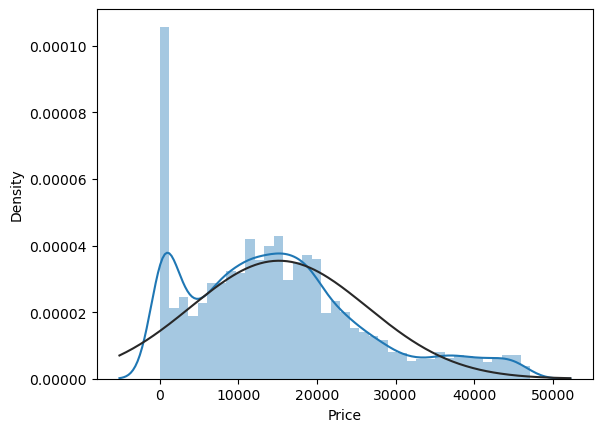

In [866]:
sns.distplot(df_tmp['Price'] , fit=norm)

In [867]:
df_tf = df_tmp.copy()

In [868]:
df_tf['Price'] = np.log1p(df_tf['Price'])

C:\conda_tmp\ipykernel_28796\184282774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tf['Price'] , fit=norm)


<Axes: xlabel='Price', ylabel='Density'>

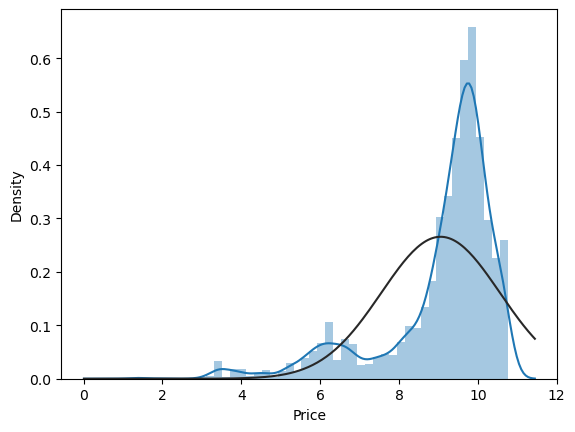

In [869]:
sns.distplot(df_tf['Price'] , fit=norm)

In [870]:
df_tf['Price'].describe()

count    12457.000000
mean         9.053621
std          1.501101
min          0.693147
25%          8.816408
50%          9.554922
75%          9.952897
max         10.760474
Name: Price, dtype: float64

In [871]:
df_tmp['Price'].describe()

count    12457.000000
mean     15171.412459
std      11259.754324
min          1.000000
25%       6743.000000
50%      14113.000000
75%      21012.000000
max      47120.000000
Name: Price, dtype: float64

## Correlation

In [872]:
corr=df_tmp.corr()
corr

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
Price,1.000000,0.088921,0.396480,0.585134,0.294390,0.330791,0.072081,0.419250,0.118539,-0.172653,NaN,0.141256,0.049085,0.019274,0.180945,0.080183,-0.113362
Levy,0.088921,1.000000,0.243978,0.233391,0.425388,0.210416,0.331904,0.203761,0.279300,-0.127318,NaN,-0.059761,-0.014893,0.091936,0.227067,0.045218,0.066334
Manufacturer,0.396480,0.243978,1.000000,0.641511,0.231466,0.284615,0.310901,0.430797,0.141391,-0.022382,NaN,0.003213,0.147201,0.033659,0.236234,0.056061,-0.121028
Model,0.585134,0.233391,0.641511,1.000000,0.183481,0.509965,0.226007,0.585606,0.230738,-0.065710,NaN,-0.013266,0.061171,0.022964,0.172488,0.078779,-0.147124
Prod. year,0.294390,0.425388,0.231466,0.183481,1.000000,0.012220,0.392232,-0.031958,0.096020,-0.297934,NaN,0.098314,-0.045751,0.122354,0.373630,0.100278,0.246995
Category,0.330791,0.210416,0.284615,0.509965,0.012220,1.000000,0.148313,0.503330,0.347333,-0.009279,NaN,-0.047775,-0.194327,0.013919,0.100410,0.053504,-0.158453
Leather interior,0.072081,0.331904,0.310901,0.226007,0.392232,0.148313,1.000000,0.144251,0.210768,-0.051381,NaN,-0.058112,0.004561,0.076072,0.366798,0.072079,0.045679
Fuel type,0.419250,0.203761,0.430797,0.585606,-0.031958,0.503330,0.144251,1.000000,0.151974,-0.007147,NaN,-0.117351,0.132816,-0.048777,0.148020,0.080610,-0.234043
Engine volume,0.118539,0.279300,0.141391,0.230738,0.096020,0.347333,0.210768,0.151974,1.000000,0.076245,NaN,0.095398,-0.032028,0.049292,0.265495,0.064394,0.173699
Mileage,-0.172653,-0.127318,-0.022382,-0.065710,-0.297934,-0.009279,-0.051381,-0.007147,0.076245,1.000000,NaN,-0.093019,0.027859,-0.009742,-0.005220,-0.007454,-0.082015


<Axes: >

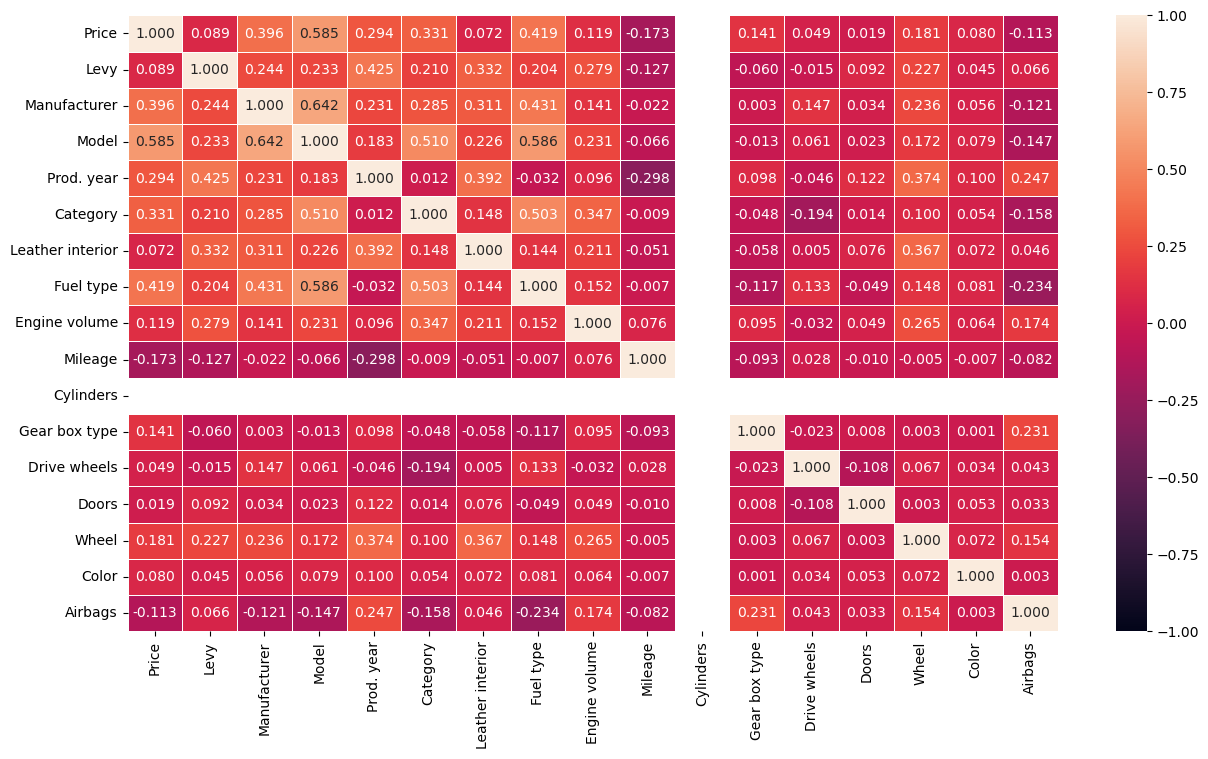

In [873]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr,annot=True,fmt='.3f',linewidth=.5, vmin=-1, vmax = 1) 

## Feature Selection

In [874]:
x=df_tmp.drop(['Price','Doors','Cylinders','Drive wheels'],axis=1)
y=df_tmp['Price']
x.shape, y.shape

((12457, 13), (12457,))

## Scaling

In [875]:
# # menggunakan robust scaler untuk mengurangi dampak outlier di tiap kolom
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# scaler.fit(x)
# df_x = scaler.transform(x)

In [876]:
# df_x = pd.DataFrame(df_x, columns=x.columns)
# df_x

# Split the data

In [877]:
from sklearn.model_selection import train_test_split

# Split data without stratify
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9965, 13), (2492, 13), (9965,), (2492,))

In [878]:
X_train

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Wheel,Color,Airbags
4500,607,13064.403886,10998.346059,2019,13263.853713,15724.627123,10536.406250,2.5,39552,14709.496981,15820.713995,14974.456980,12
3960,781,13063.239417,10994.213054,2012,13263.278168,15724.239459,10535.253777,2.5,156518,14709.135188,15820.417477,15976.131671,12
7850,640,12896.125000,17956.772727,2013,20660.071194,15724.312002,13999.307983,2.0,103112,14709.202889,15820.472963,14785.185433,12
11921,0,12884.354244,19914.000000,2004,19707.077419,13913.489731,24020.888576,2.4,185641,13425.192731,15819.101343,15971.371045,4
3438,781,13243.765043,11816.482270,2012,13261.584119,15723.098417,13997.653755,2.5,160000,14708.070289,15819.544708,13684.458564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18463,0,9572.338057,7585.485714,2005,11537.317025,13916.297262,13808.232510,1.3,212000,14708.678849,8727.663149,14971.747590,2
8018,738,11619.397260,8769.400000,2017,11540.360780,15724.634400,13999.747441,1.4,47208,14709.503773,15820.719562,16537.511791,12
8316,394,13063.701943,10995.854680,2014,13263.506774,15724.393439,10535.711538,2.5,128739,14709.278892,15820.535254,11874.902778,12
1289,831,19911.565789,16056.710145,2017,13258.624936,15721.105233,13994.936860,1.6,88400,14706.210112,15818.020145,15967.460211,4


# Modelling

In [879]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error

## Looking for the best model

In [880]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor()
}

# List to store results
results = []

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate R-squared and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Append results to the list
    results.append({
        "Model": name,
        "R-squared": r2,
        "RMSE": rmse
    })
results_df = pd.DataFrame(results)
results_df

,Model,R-squared,RMSE
0,LinearRegression,0.450946,8346.564653
1,RandomForestRegressor,0.999990,34.854548
2,GradientBoostingRegressor,0.999797,160.472243
3,DecisionTreeRegressor,0.999993,30.276998
4,KNeighborsRegressor,0.428560,8515.014576
5,XGBRegressor,0.998821,386.783244


In [897]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)  # Use negative RMSE for compatibility

# List to store results
results = []

# Evaluate models
for name, model in models.items():
    # Cross-validation for R-squared
    r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')  # R-squared scoring
    # Cross-validation for RMSE
    rmse_scores = cross_val_score(model, x, y, cv=5, scoring=rmse_scorer)

    # Append results
    results.append({
        "Model": name,
        "Avg R-squared": np.mean(r2_scores),
        "Std R-squared": np.std(r2_scores),
        "Avg RMSE": -np.mean(rmse_scores),  # Convert back to positive
        "Std RMSE": np.std(-rmse_scores)   # Convert back to positive
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by R-squared
results_df = results_df.sort_values(by="Avg R-squared", ascending=False)


In [965]:
results_df

,Model,Avg R-squared,Std R-squared,Avg RMSE,Std RMSE
1,RandomForestRegressor,0.999686,0.000574,119.197670,153.670180
2,GradientBoostingRegressor,0.999520,0.000549,215.871659,111.443254
3,DecisionTreeRegressor,0.999327,0.000829,111.158237,152.340656
5,XGBRegressor,0.996068,0.004136,597.311529,374.308113
0,LinearRegression,0.468806,0.021306,8201.973510,113.877816
4,KNeighborsRegressor,0.455434,0.019482,8305.907304,149.659937


## Export Model

In [884]:
import pickle

In [885]:
# Save the decision tree model, as the best model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Save model with pickle
with open('car_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Test to predict new data

## New Data

In [918]:
data_baru = {
  'Levy': [1667, 2198, 4739, 4131, 2674],
  'Manufacturer': ['AUDI', 'TOYOTA', 'SUZUKI', 'LEXUS', 'MERCEDES-BENZ'],
  'Model': ['Model D', 'Model D', 'Model C', 'Model B', 'Model C'],
  'Prod. year': [2003, 2005, 2013, 1990, 2008],
  'Category': ['Sedan', 'Jeep', 'Hatchback', 'Coupe', 'Sedan'],
  'Leather interior': ['Yes', 'Yes', 'No', 'No', 'No'],
  'Fuel type': ['Hybrid', 'Hybrid', 'Petrol', 'Hybrid', 'Petrol'],
  'Engine volume': [3.0, 3.0, 4.0, 3.0, 3.0],
  'Mileage': [70000, 5000, 5000, 100000, 50000],
  'Cylinders': [8.0, 8.0, 6.0, 6.0, 4.0],
  'Gear box type': ['Automatic', 'Automatic', 'Automatic', 'Manual', 'Automatic'],
  'Drive wheels': ['Rear', '4x4', 'Front', 'Front', '4x4'],
  'Doors': ['04-May', '04-May', '02-Mar', '02-Mar', '02-Mar'],
  'Wheel': ['Left wheel', 'Right-hand drive	', 'Right-hand drive', 'Left wheel', 'Right-hand drive'],
  'Color': ['Black', 'Red', 'Silver', 'Silver', 'White'],
  'Airbags': [4, 8, 6, 2, 8]
}

In [947]:
df_new = pd.DataFrame(data_baru)
df_new

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1667,AUDI,Model D,2003,Sedan,Yes,Hybrid,3.0,70000,8.0,Automatic,Rear,04-May,Left wheel,Black,4
1,2198,TOYOTA,Model D,2005,Jeep,Yes,Hybrid,3.0,5000,8.0,Automatic,4x4,04-May,Right-hand drive\t,Red,8
2,4739,SUZUKI,Model C,2013,Hatchback,No,Petrol,4.0,5000,6.0,Automatic,Front,02-Mar,Right-hand drive,Silver,6
3,4131,LEXUS,Model B,1990,Coupe,No,Hybrid,3.0,100000,6.0,Manual,Front,02-Mar,Left wheel,Silver,2
4,2674,MERCEDES-BENZ,Model C,2008,Sedan,No,Petrol,3.0,50000,4.0,Automatic,4x4,02-Mar,Right-hand drive,White,8


## Predicting

In [956]:
df_prediction = df_new.copy()
df_prediction

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1667,AUDI,Model D,2003,Sedan,Yes,Hybrid,3.0,70000,8.0,Automatic,Rear,04-May,Left wheel,Black,4
1,2198,TOYOTA,Model D,2005,Jeep,Yes,Hybrid,3.0,5000,8.0,Automatic,4x4,04-May,Right-hand drive\t,Red,8
2,4739,SUZUKI,Model C,2013,Hatchback,No,Petrol,4.0,5000,6.0,Automatic,Front,02-Mar,Right-hand drive,Silver,6
3,4131,LEXUS,Model B,1990,Coupe,No,Hybrid,3.0,100000,6.0,Manual,Front,02-Mar,Left wheel,Silver,2
4,2674,MERCEDES-BENZ,Model C,2008,Sedan,No,Petrol,3.0,50000,4.0,Automatic,4x4,02-Mar,Right-hand drive,White,8


In [957]:
df_encode = df_prediction.copy()
df_encode[categorical_columns] = loo_encoder.transform(df_encode[categorical_columns])
df_encode = df_encode.drop(columns=['Doors','Cylinders','Drive wheels'])
df_encode

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Wheel,Color,Airbags
0,1667,11661.209524,15171.412459,2003,13261.622428,15722.839917,10532.875386,3.0,70000,14707.938450,15819.338457,14969.202355,4
1,2198,13059.959417,15171.412459,2005,20653.618248,15722.839917,10532.875386,3.0,5000,14707.938450,15171.412459,13114.212302,8
2,4739,9300.574468,15171.412459,2013,11535.846918,13914.697815,13997.573048,4.0,5000,14707.938450,8726.883128,14780.799777,6
3,4131,10940.686916,15171.412459,1990,15622.356223,13914.697815,10532.875386,3.0,100000,13430.778878,15819.338457,14780.799777,2
4,2674,15727.391982,15171.412459,2008,13261.622428,13914.697815,13997.573048,3.0,50000,14707.938450,8726.883128,15972.179872,8


In [958]:
prediction = model.predict(df_encode)

In [959]:
prediction

array([15792.515, 11727.234,  8189.526, 15264.169,  8117.167],
      dtype=float32)

In [960]:
df_prediction['Price'] = prediction

In [963]:
df_prediction = df_prediction[df_columns].round()

In [964]:
df_prediction

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,15793.0,1667,AUDI,Model D,2003,Sedan,Yes,Hybrid,3.0,70000,8.0,Automatic,Rear,04-May,Left wheel,Black,4
1,11727.0,2198,TOYOTA,Model D,2005,Jeep,Yes,Hybrid,3.0,5000,8.0,Automatic,4x4,04-May,Right-hand drive\t,Red,8
2,8190.0,4739,SUZUKI,Model C,2013,Hatchback,No,Petrol,4.0,5000,6.0,Automatic,Front,02-Mar,Right-hand drive,Silver,6
3,15264.0,4131,LEXUS,Model B,1990,Coupe,No,Hybrid,3.0,100000,6.0,Manual,Front,02-Mar,Left wheel,Silver,2
4,8117.0,2674,MERCEDES-BENZ,Model C,2008,Sedan,No,Petrol,3.0,50000,4.0,Automatic,4x4,02-Mar,Right-hand drive,White,8
